In [10]:
import pandas as pd
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Data
data = {
    "Major_CROP": [
        "apple", "banana", "blackgram", "chickpea", "coconut", "coffee",
        "cotton", "grapes", "jute", "kidneybeans", "lentil", "maize",
        "mango", "mothbeans", "mungbean", "muskmelon", "orange", "papaya",
        "pigeonpeas", "pomegranate", "rice", "watermelon"
    ],
    "Nitrogen": [
        20.80, 100.23, 40.02, 40.09, 21.98, 101.20, 117.77, 23.18, 78.40,
        20.75, 18.77, 77.76, 20.07, 21.44, 20.99, 100.32, 19.58, 49.88,
        20.73, 18.87, 79.89, 99.42
    ],
    "Phosphorus": [
        134.22, 82.01, 67.47, 67.79, 16.93, 28.74, 46.24, 132.53, 46.86,
        67.54, 68.36, 48.44, 27.18, 48.01, 47.28, 17.72, 16.55, 59.05,
        67.73, 18.75, 47.58, 17.00
    ],
    "Potassium": [
        199.89, 50.05, 19.24, 79.92, 30.59, 29.94, 19.56, 200.11, 39.99,
        20.05, 19.41, 19.79, 29.92, 20.23, 19.87, 50.08, 10.01, 50.04,
        20.29, 40.21, 39.87, 50.22
    ],
    "pH": [
        5.93, 5.98, 7.13, 7.34, 5.98, 6.79, 6.91, 6.03, 6.73, 5.75, 6.93,
        6.25, 5.77, 6.83, 6.72, 6.36, 7.02, 6.74, 5.79, 6.43, 6.43, 6.50
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("crop_data.csv", index=False)

# Save as Excel file
df.to_excel("crop_data.xlsx", index=False)

print("Files generated: crop_data.csv and crop_data.xlsx")


Files generated: crop_data.csv and crop_data.xlsx


In [11]:
# ----- DATA -----
data = {
    "Major_CROP": [
        "apple","banana","blackgram","chickpea","coconut","coffee","cotton","grapes",
        "jute","kidneybeans","lentil","maize","mango","mothbeans","mungbean",
        "muskmelon","orange","papaya","pigeonpeas","pomegranate","rice","watermelon"
    ],
    "Mean_pH": [
        5.93,5.98,7.13,7.34,5.98,6.79,6.91,6.03,6.73,5.75,6.93,6.25,5.77,6.83,6.72,
        6.36,7.02,6.74,5.79,6.43,6.43,6.50
    ],
    "Soil_Quality": [
        "Moderately acidic","Moderately acidic","Slightly alkaline","Slightly alkaline",
        "Moderately acidic","Slightly acidic","Slightly acidic","Moderately acidic",
        "Slightly acidic","Moderately acidic","Slightly acidic","Moderately acidic",
        "Moderately acidic","Slightly acidic","Slightly acidic","Moderately acidic",
        "Very strongly alkaline","Slightly acidic","Moderately acidic",
        "Moderately acidic","Moderately acidic","Moderately acidic"
    ]
}

df = pd.DataFrame(data)

# ----- SAVE / DOWNLOAD -----

# Save as CSV
df.to_csv("crop_ph_table.csv", index=False)

# Save as Excel
df.to_excel("crop_ph_table.xlsx", index=False)

print("Files saved:")
print(" - crop_ph_table.csv")
print(" - crop_ph_table.xlsx")

Files saved:
 - crop_ph_table.csv
 - crop_ph_table.xlsx


In [12]:
import pandas as pd

data = {
    "Crop": [
        "apple","banana","blackgram","chickpea","coconut","coffee","cotton","grapes",
        "jute","kidneybeans","lentil","maize","mango","mothbeans","mungbean",
        "muskmelon","orange","papaya","pigeonpeas","pomegranate","rice","watermelon"
    ],
    "Nitrogen (N)": [
        "0–40","80–120","20–60","20–60","0–40","80–120","100–140","0–40",
        "60–100","0–40","0–40","60–100","0–40","0–40","0–40",
        "80–120","0–40","31–70","0–40","0–40","60–99","80–120"
    ],
    "Phosphorus (P)": [
        "120–145","70–95","55–80","55–80","5–30","15–40","35–60","120–145",
        "35–60","55–80","55–80","35–60","15–40","35–60","35–60",
        "5–30","5–30","46–70","55–80","5–30","35–60","5–30"
    ],
    "Potassium (K)": [
        "195–205","45–55","15–25","75–85","25–35","25–35","15–25","195–205",
        "35–45","15–25","15–25","15–25","25–35","15–25","15–25",
        "45–55","5–15","45–55","15–25","35–45","35–45","45–55"
    ],
    "Suitable pH Range": [
        "5.51–6.5","5.51–6.49","6.5–7.78","5.99–8.87","5.5–6.47","6.02–7.49","5.8–7.99","5.51–6.5",
        "6.0–7.49","5.5–6.0","5.92–7.84","5.51–7.0","4.51–6.97","3.5–9.94","6.22–7.2",
        "6.0–6.78","6.01–8.0","6.5–6.99","4.55–7.45","5.56–7.2","5.01–7.87","6.0–6.96"
    ]
}

df = pd.DataFrame(data)

# Display the table
print(df)

# ---- DOWNLOAD / EXPORT SECTION ----

# Save to CSV
df.to_csv("crop_nutrient_table.csv", index=False)
print("CSV file saved as crop_nutrient_table.csv")

# Save to Excel
df.to_excel("crop_nutrient_table.xlsx", index=False)
print("Excel file saved as crop_nutrient_table.xlsx")


           Crop Nitrogen (N) Phosphorus (P) Potassium (K) Suitable pH Range
0         apple         0–40        120–145       195–205          5.51–6.5
1        banana       80–120          70–95         45–55         5.51–6.49
2     blackgram        20–60          55–80         15–25          6.5–7.78
3      chickpea        20–60          55–80         75–85         5.99–8.87
4       coconut         0–40           5–30         25–35          5.5–6.47
5        coffee       80–120          15–40         25–35         6.02–7.49
6        cotton      100–140          35–60         15–25          5.8–7.99
7        grapes         0–40        120–145       195–205          5.51–6.5
8          jute       60–100          35–60         35–45          6.0–7.49
9   kidneybeans         0–40          55–80         15–25           5.5–6.0
10       lentil         0–40          55–80         15–25         5.92–7.84
11        maize       60–100          35–60         15–25          5.51–7.0
12        ma

In [13]:
import pandas as pd

# -----------------------------
# CREATE THE TABLE DATA
# -----------------------------
data = {
    "Class": [
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
        10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21
    ],
    "Label": [
        "apple", "banana", "blackgram", "chickpea", "coconut",
        "coffee", "cotton", "grapes", "jute", "kidneybeans",
        "lentil", "maize", "mango", "mothbeans", "mungbean",
        "muskmelon", "orange", "papaya", "pigeonpeas", "pomegranate",
        "rice", "watermelon"
    ],
    "Precision": [
        1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 0.92, 0.95,
        0.73, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 0.96, 1.00,
        1.00, 1.00
    ],
    "Recall": [
        1.00, 1.00, 0.95, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 0.95,
        1.00, 1.00, 1.00, 0.88, 1.00,
        1.00, 1.00, 1.00, 0.96, 1.00,
        0.89, 1.00
    ],
    "F1-Score": [
        1.00, 1.00, 0.97, 1.00, 1.00,
        1.00, 1.00, 1.00, 0.96, 0.95,
        0.85, 1.00, 1.00, 0.93, 1.00,
        1.00, 1.00, 1.00, 0.96, 1.00,
        0.94, 1.00
    ],
    "Support": [
        23, 21, 20, 26, 27,
        17, 17, 14, 23, 20,
        11, 21, 19, 24, 19,
        17, 14, 23, 23, 23,
        19, 19
    ]
}

df = pd.DataFrame(data)

print("=== TABLE 4 (MODEL PERFORMANCE) ===\n")
print(df)
print("\nOverall Accuracy: 0.98")

# -----------------------------
# SAVE / DOWNLOAD FILES
# -----------------------------

# Save as CSV
df.to_csv("model_performance_table.csv", index=False)

# Save as Excel (.xlsx)
df.to_excel("model_performance_table.xlsx", index=False)

# Save as JSON
df.to_json("model_performance_table.json", orient="records", indent=4)

print("\nFiles saved:")
print(" - model_performance_table.csv")
print(" - model_performance_table.xlsx")
print(" - model_performance_table.json")


=== TABLE 4 (MODEL PERFORMANCE) ===

    Class        Label  Precision  Recall  F1-Score  Support
0       0        apple       1.00    1.00      1.00       23
1       1       banana       1.00    1.00      1.00       21
2       2    blackgram       1.00    0.95      0.97       20
3       3     chickpea       1.00    1.00      1.00       26
4       4      coconut       1.00    1.00      1.00       27
5       5       coffee       1.00    1.00      1.00       17
6       6       cotton       1.00    1.00      1.00       17
7       7       grapes       1.00    1.00      1.00       14
8       8         jute       0.92    1.00      0.96       23
9       9  kidneybeans       0.95    0.95      0.95       20
10     10       lentil       0.73    1.00      0.85       11
11     11        maize       1.00    1.00      1.00       21
12     12        mango       1.00    1.00      1.00       19
13     13    mothbeans       1.00    0.88      0.93       24
14     14     mungbean       1.00    1.00      1

In [14]:
import pandas as pd

# =========================
# TABLE 1 (MEAN NPK + pH)
# =========================

table1 = pd.DataFrame([
    ["apple",20.80,134.22,199.89,5.93],
    ["banana",100.23,82.01,50.05,5.98],
    ["blackgram",40.02,67.47,19.24,7.13],
    ["chickpea",40.09,67.79,79.92,7.34],   # ✔ FIXED LINE
    ["coconut",21.98,16.93,30.59,5.98],
    ["coffee",101.20,28.74,29.94,6.79],
    ["cotton",117.77,46.24,19.56,6.91],
    ["grapes",23.18,132.53,200.11,6.03],
    ["jute",78.40,46.86,39.99,6.73],
    ["kidneybeans",20.75,67.54,20.05,5.75],
    ["lentil",18.77,68.36,19.41,6.93],
    ["maize",77.76,48.44,19.79,6.25],
    ["mango",20.07,27.18,29.92,5.77],
    ["mothbeans",21.44,48.01,20.23,6.83],
    ["mungbean",20.99,47.28,19.87,6.72],
    ["muskmelon",100.32,17.72,50.08,6.36],
    ["orange",19.58,16.55,10.01,7.02],
    ["papaya",49.88,59.05,50.04,6.74],
    ["pigeonpeas",20.73,67.73,20.29,5.79],
    ["pomegranate",18.87,18.75,40.21,6.43],
    ["rice",79.89,47.58,39.87,6.43],
    ["watermelon",99.42,17.00,50.22,6.50],
], columns=["label","N","P","K","ph"])


# =========================
# TABLE 2 (SOIL QUALITY)
# =========================

table2 = pd.DataFrame([
    ["apple",20.80,134.22,199.89,5.93,"Moderately acidic"],
    ["banana",100.23,82.01,50.05,5.98,"Moderately acidic"],
    ["blackgram",40.02,67.47,19.24,7.13,"Slightly alkaline"],
    ["chickpea",40.09,67.79,79.92,7.34,"Slightly alkaline"],
    ["coconut",21.98,16.93,30.59,5.98,"Moderately acidic"],
    ["coffee",101.20,28.74,29.94,6.79,"Slightly acidic"],
    ["cotton",117.77,46.24,19.56,6.91,"Slightly acidic"],
    ["grapes",23.18,132.53,200.11,6.03,"Moderately acidic"],
    ["jute",78.40,46.86,39.99,6.73,"Slightly acidic"],
    ["kidneybeans",20.75,67.54,20.05,5.75,"Moderately acidic"],
    ["lentil",18.77,68.36,19.41,6.93,"Slightly acidic"],
    ["maize",77.76,48.44,19.79,6.25,"Moderately acidic"],
    ["mango",20.07,27.18,29.92,5.77,"Moderately acidic"],
    ["mothbeans",21.44,48.01,20.23,6.83,"Slightly acidic"],
    ["mungbean",20.99,47.28,19.87,6.72,"Slightly acidic"],
    ["muskmelon",100.32,17.72,50.08,6.36,"Moderately acidic"],
    ["orange",19.58,16.55,10.01,7.02,"Slightly alkaline"],
    ["papaya",49.88,59.05,50.04,6.74,"Slightly acidic"],
    ["pigeonpeas",20.73,67.73,20.29,5.79,"Moderately acidic"],
    ["pomegranate",18.87,18.75,40.21,6.43,"Moderately acidic"],
    ["rice",79.89,47.58,39.87,6.43,"Moderately acidic"],
    ["watermelon",99.42,17.00,50.22,6.50,"Moderately acidic"],
], columns=["label","N","P","K","ph","Soil Quality"])


# =========================
# TABLE 3 (NPK & pH RANGES)
# =========================

table3 = pd.DataFrame([
    ["apple","0–40","120–145","195–205","5.51–6.5"],
    ["banana","80–120","70–95","45–55","5.51–6.49"],
    ["blackgram","20–60","55–80","15–25","6.5–7.78"],
    ["chickpea","20–60","55–80","75–85","5.99–8.87"],
    ["coconut","0–40","5–30","25–35","5.5–6.47"],
    ["coffee","80–120","15–40","25–35","6.02–7.49"],
    ["cotton","100–140","35–60","15–25","5.8–7.99"],
    ["grapes","0–40","120–145","195–205","5.51–6.5"],
    ["jute","60–100","35–60","35–45","6.0–7.49"],
    ["kidneybeans","0–40","55–80","15–25","5.5–6.0"],
    ["lentil","0–40","55–80","15–25","5.92–7.84"],
    ["maize","60–100","35–60","15–25","5.51–7.0"],
    ["mango","0–40","15–40","25–35","4.51–6.97"],
    ["mothbeans","0–40","35–60","15–25","3.5–9.94"],
    ["mungbean","0–40","35–60","15–25","6.22–7.2"],
    ["muskmelon","80–120","5–30","45–55","6.0–6.78"],
    ["orange","0–40","5–30","5–15","6.01–8.0"],
    ["papaya","31–70","46–70","45–55","6.5–6.99"],
    ["pigeonpeas","0–40","55–80","15–25","4.55–7.45"],
    ["pomegranate","0–40","5–30","35–45","5.56–7.2"],
    ["rice","60–99","35–60","35–45","5.01–7.87"],
    ["watermelon","80–120","5–30","45–55","6.0–6.96"],
], columns=["label","Nitrogen Range","Phosphorus Range","Potassium Range","pH Range"])


# =========================
# EXPORT / DOWNLOAD CODE
# =========================

# CSV EXPORT
table1.to_csv("table1_mean_npk_ph.csv", index=False)
table2.to_csv("table2_soil_quality.csv", index=False)
table3.to_csv("table3_npk_ph_ranges.csv", index=False)

# EXCEL EXPORT (.xlsx)
with pd.ExcelWriter("all_tables.xlsx") as writer:
    table1.to_excel(writer, sheet_name="Table1", index=False)
    table2.to_excel(writer, sheet_name="Table2", index=False)
    table3.to_excel(writer, sheet_name="Table3", index=False)

print("Download files created successfully.")


Download files created successfully.


In [18]:
# ============================================================
# ============================================================

# ============================================================
# 13. SAVE FIGURES AS PNG
# ============================================================

# FULL ROC CURVE
plt.figure(figsize=(10,6))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("Receiver Operating Characteristic (Full)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=7)
plt.tight_layout()
plt.savefig("Figure_ROC_full.png")
plt.close()

# MAGNIFIED ROC CURVE
plt.figure(figsize=(10,6))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.xlim(0, 0.04)
plt.ylim(0.90, 1.01)
plt.title("Receiver Operating Characteristic (Magnified)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=7)
plt.tight_layout()
plt.savefig("Figure_ROC_magnified.png")
plt.close()

print("\nSaved ROC figures:")
print(" - Figure_ROC_full.png")
print(" - Figure_ROC_magnified.png")

# ============================================================
# 14. ACCURACY CURVE (OPTIONAL)
# ============================================================

train_acc = []
val_acc = []

temp_model = MLPClassifier(hidden_layer_sizes=(32,16), 
                           max_iter=1, warm_start=True, random_state=42)

for epoch in range(200):
    temp_model.fit(X_train, y_train)
    train_acc.append(temp_model.score(X_train, y_train))
    val_acc.append(temp_model.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,201), train_acc, label="Training Accuracy")
plt.plot(range(1,201), val_acc, label="Validation Accuracy")
plt.title("Accuracy Curve (Training vs Validation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.savefig("Figure_accuracy_curve.png")
plt.close()

print("\nSaved accuracy curve:")
print(" - Figure_accuracy_curve.png")
# ============================================================
# 12. SAVE TABLES AS CSV
# ============================================================

# Make sure table1, table2, table3, table4 all exist
try:
    table1.to_csv("Table1_mean_NPK_pH.csv", index=False)
    table2.to_csv("Table2_soil_quality.csv", index=False)
    table3.to_csv("Table3_nutrient_ranges.csv", index=False)
    table4.to_csv("Table4_model_performance.csv", index=False)

    print("\nSaved CSV files:")
    print(" - Table1_mean_NPK_pH.csv")
    print(" - Table2_soil_quality.csv")
    print(" - Table3_nutrient_ranges.csv")
    print(" - Table4_model_performance.csv")

except NameError:
    print("\nERROR: One or more tables (table1, table2, table3, table4) are not defined.")
    print("Please run the earlier sections of the script before saving.")



NameError: name 'class_names' is not defined

<Figure size 1000x600 with 0 Axes>

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Overall Accuracy: 0.98

=== TABLE 4 (MODEL PERFORMANCE) ===

    Class        Label  Precision  Recall  F1-Score  Support
0       0        apple       1.00    1.00      1.00       23
1       1       banana       1.00    1.00      1.00       21
2       2    blackgram       1.00    0.95      0.97       20
3       3     chickpea       1.00    1.00      1.00       26
4       4      coconut       1.00    1.00      1.00       27
5       5       coffee       1.00    1.00      1.00       17
6       6       cotton       1.00    1.00      1.00       17
7       7       grapes       1.00    1.00      1.00       14
8       8         jute       0.92    1.00      0.96       23
9       9  kidneybeans       0.95    0.95      0.95       20
10     10       lentil       0.73    1.00      0.85       11
11     11        maize       1.00    1.00      1.00       21
12     12        mango 

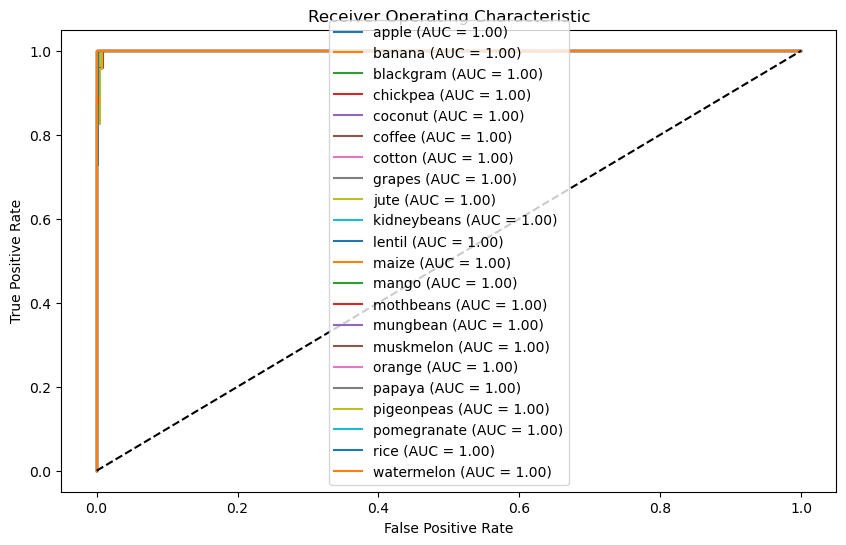

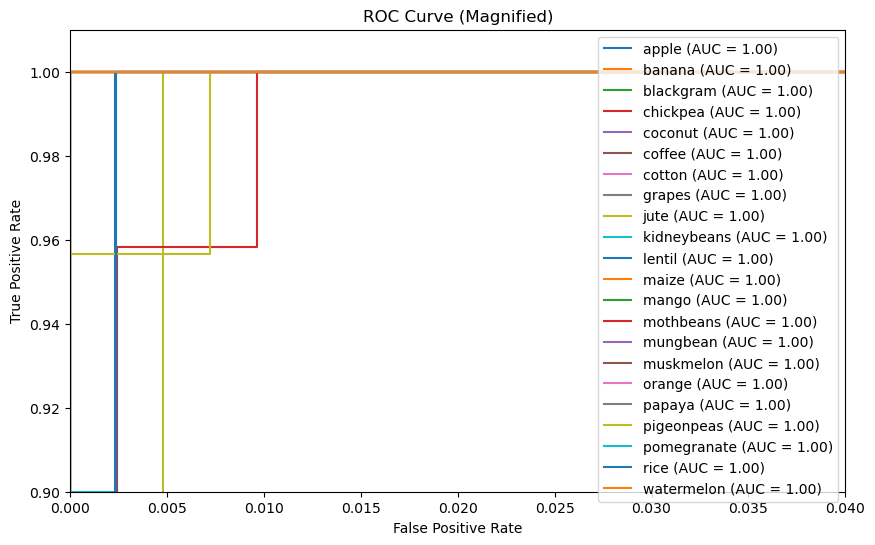


=== TABLE 1 (MEAN NPK + pH) ===

          label       N       P       K    ph
0         apple   20.80  134.22  199.89  5.93
1        banana  100.23   82.01   50.05  5.98
2     blackgram   40.02   67.47   19.24  7.13
3      chickpea   40.09   67.79   79.92  7.34
4       coconut   21.98   16.93   30.59  5.98
5        coffee  101.20   28.74   29.94  6.79
6        cotton  117.77   46.24   19.56  6.91
7        grapes   23.18  132.53  200.11  6.03
8          jute   78.40   46.86   39.99  6.73
9   kidneybeans   20.75   67.54   20.05  5.75
10       lentil   18.77   68.36   19.41  6.93
11        maize   77.76   48.44   19.79  6.25
12        mango   20.07   27.18   29.92  5.77
13    mothbeans   21.44   48.01   20.23  6.83
14     mungbean   20.99   47.28   19.87  6.72
15    muskmelon  100.32   17.72   50.08  6.36
16       orange   19.58   16.55   10.01  7.02
17       papaya   49.88   59.05   50.04  6.74
18   pigeonpeas   20.73   67.73   20.29  5.79
19  pomegranate   18.87   18.75   40.21  6.43


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from scipy.stats import uniform
import matplotlib.pyplot as plt

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("Crop_recommendation.csv")

X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y_text = df['label']

le = LabelEncoder()
y = le.fit_transform(y_text)
class_names = le.classes_

# ============================================================
# 3. TRAIN–TEST SPLIT + SCALING
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================================================
# 4. RANDOMIZED SEARCH (COARSE TUNING)
# ============================================================
param_dist = {
    "hidden_layer_sizes": [(32,), (64,), (32, 16), (64, 32), (128, 64), (64, 64, 32)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": uniform(0.0001, 0.01),
    "alpha": uniform(0.0001, 0.01),
    "batch_size": [16, 32, 64, 128],
    "max_iter": [300]
}

rand_search = RandomizedSearchCV(
    MLPClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rand_search.fit(X_train, y_train)
best_rand = rand_search.best_params_

# ============================================================
# 5. GRID SEARCH (FINE TUNING)
# ============================================================
param_grid = {
    "hidden_layer_sizes": [
        best_rand["hidden_layer_sizes"],
        (best_rand["hidden_layer_sizes"][0] * 2,),
        (best_rand["hidden_layer_sizes"][0], best_rand["hidden_layer_sizes"][0] // 2)
    ],
    "learning_rate_init": [
        best_rand["learning_rate_init"],
        best_rand["learning_rate_init"] / 2,
        best_rand["learning_rate_init"] * 2
    ],
    "alpha": [
        best_rand["alpha"],
        best_rand["alpha"] / 2,
        best_rand["alpha"] * 2
    ],
    "learning_rate": [best_rand["learning_rate"]],
    "activation": [best_rand["activation"]],
    "solver": ["adam"],
    "batch_size": [best_rand["batch_size"]],
    "max_iter": [500],
}

grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# ============================================================
# 6. FINAL TRAINED OPTIMIZED MODEL
# ============================================================
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

overall_acc = round(accuracy_score(y_test, y_pred), 2)
print("\nOverall Accuracy:", overall_acc)

# ============================================================
# 7. TABLE 4 — PRECISION, RECALL, F1-SCORE, SUPPORT
# ============================================================
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
support = np.bincount(y_test)

table4 = pd.DataFrame({
    "Class": np.arange(len(class_names)),
    "Label": class_names,
    "Precision": precision.round(2),
    "Recall": recall.round(2),
    "F1-Score": f1.round(2),
    "Support": support
})

print("\n=== TABLE 4 (MODEL PERFORMANCE) ===\n")
print(table4)

# ============================================================
# 8. ROC CURVES (FIGURE 9a & 9b) + IMAGE DOWNLOAD
# ============================================================
y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))
y_score = best_model.predict_proba(X_test)

# ---------- FULL ROC ----------
plt.figure(figsize=(10, 6))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# *** SAVE IMAGE ***
plt.savefig("roc_curve_full.png", dpi=300, bbox_inches='tight')

plt.show()

# ---------- MAGNIFIED ROC ----------
plt.figure(figsize=(10, 6))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.xlim(0, 0.04)
plt.ylim(0.90, 1.01)
plt.title("ROC Curve (Magnified)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# *** SAVE IMAGE ***
plt.savefig("roc_curve_zoomed.png", dpi=300, bbox_inches='tight')

plt.show()

# ============================================================
# 9. TABLE 1 — MEAN NPK & pH
# ============================================================
table1 = df.groupby("label")[["N","P","K","ph"]].mean().round(2).reset_index()
print("\n=== TABLE 1 (MEAN NPK + pH) ===\n")
print(table1)

# ============================================================
# 10. TABLE 2 — SOIL QUALITY CLASSIFICATION
# ============================================================
def classify_soil(pH):
    if pH < 4.5: return "Strongly acidic"
    elif pH <= 5.5: return "Highly acidic"
    elif pH <= 6.5: return "Moderately acidic"
    elif pH <= 7.0: return "Slightly acidic"
    elif pH == 7.0: return "Neutral"
    elif pH <= 8.0: return "Slightly alkaline"
    elif pH <= 9.0: return "Moderately alkaline"
    elif pH <= 10.0: return "Strongly alkaline"
    else: return "Very strongly alkaline"

table2 = table1.copy()
table2["Soil Quality"] = table2["ph"].apply(classify_soil)
print("\n=== TABLE 2 (SOIL QUALITY) ===\n")
print(table2)

# ============================================================
# 11. TABLE 3 — MIN–MAX NPK & pH RANGES
# ============================================================
ranges = df.groupby("label")[["N","P","K","ph"]].agg(["min","max"]).round(2)
ranges.columns = [f"{col}_{stat}" for col, stat in ranges.columns]
ranges = ranges.reset_index()

ranges["Nitrogen Range"]   = ranges["N_min"].astype(str) + "–" + ranges["N_max"].astype(str)
ranges["Phosphorus Range"] = ranges["P_min"].astype(str) + "–" + ranges["P_max"].astype(str)
ranges["Potassium Range"]  = ranges["K_min"].astype(str) + "–" + ranges["K_max"].astype(str)
ranges["pH Range"]         = ranges["ph_min"].astype(str) + "–" + ranges["ph_max"].astype(str)

table3 = ranges[["label","Nitrogen Range","Phosphorus Range","Potassium Range","pH Range"]]
print("\n=== TABLE 3 (NPK & pH RANGES) ===\n")
print(table3)
